In [1]:
import numpy as np
import pandas as pd
import glob
import os
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt 
#import statsmodels.formula.api as smf
#from scipy.stats import skew

In [55]:
CTSdata = pd.read_csv("OASIS_External_RTO_CTS_Prices" + ".csv")

# Let's have a look at the NYISO CTS data
# External RTO CTS price refers to ISONE
# Gen LBMP is the Sandy Pond LMP at the New York's system

print(CTSdata.shape)
CTSdata.head(20)
#CTSdata.describe()

(350110, 7)


,RTC Execution Time,RTC End Time Stamp,RTC Timestep,Gen Name,Gen PTID,Gen LBMP,External RTO CTS Price
0,2018/01/01 00:00:00,2018/01/01 00:30:00,1,N.E._GEN_SANDY PD,24062,152.98,132.98
1,2018/01/01 00:00:00,2018/01/01 00:45:00,2,N.E._GEN_SANDY PD,24062,148.84,128.84
2,2018/01/01 00:00:00,2018/01/01 01:00:00,3,N.E._GEN_SANDY PD,24062,141.54,121.54
3,2018/01/01 00:00:00,2018/01/01 01:15:00,4,N.E._GEN_SANDY PD,24062,140.82,120.82
4,2018/01/01 00:00:00,2018/01/01 01:30:00,5,N.E._GEN_SANDY PD,24062,140.60,120.60
5,2018/01/01 00:00:00,2018/01/01 01:45:00,6,N.E._GEN_SANDY PD,24062,139.27,119.27
6,2018/01/01 00:00:00,2018/01/01 02:00:00,7,N.E._GEN_SANDY PD,24062,135.51,121.91
7,2018/01/01 00:00:00,2018/01/01 02:15:00,8,N.E._GEN_SANDY PD,24062,130.27,120.71
8,2018/01/01 00:00:00,2018/01/01 02:30:00,9,N.E._GEN_SANDY PD,24062,123.55,120.59
9,2018/01/01 00:00:00,2018/01/01 02:45:00,10,N.E._GEN_SANDY PD,24062,121.00,119.61


0.4449063151580772
18.982357552090782
-46.23725642092418
1.2600000000000016


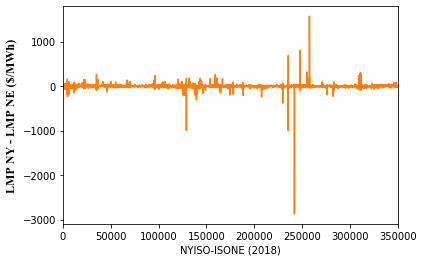

In [3]:
F4 = plt.figure()
figFont = {'fontname':'Times New Roman'}
CTSdata['Spread'] = CTSdata['Gen LBMP'] - CTSdata['External RTO CTS Price']
Figure = CTSdata['Spread'].plot(color='tab:orange');
plt.ylabel('LMP NY - LMP NE ($/MWh)', fontsize=12, **figFont)
plt.xlabel('NYISO-ISONE (2018)')
#Figure.axes.get_xaxis().set_visible(False)
F4.savefig("SpreadNYNE.png", bbox_inches='tight')
print(CTSdata['Spread'].mean())
print(CTSdata['Spread'].std())
print(CTSdata['Spread'].skew())
print(CTSdata['Spread'].median())

In [4]:
print(abs(CTSdata['Spread']).mean())
print(abs(CTSdata['Spread']).std())
print(abs(CTSdata['Spread']).skew())
print(abs(CTSdata['Spread']).median())

5.5994374053855545
18.14315440100926
66.96724632322416
2.9499999999999993


### Let's now take a look at the PJM-NYISO market that has some transaction costs / tariffs

In [5]:
CTSdata_PJM = pd.read_csv("OASIS_External_RTO_CTS_Prices_2" + ".csv")
# Let's have a look at the NYISO CTS data
# External RTO CTS price refers to PJM Keystone location
# Gen LBMP is the Sandy Pond LMP at the New York's system
print(type(CTSdata_PJM))
print(CTSdata_PJM.shape)
CTSdata_PJM.head()
#CTSdata.describe()

<class 'pandas.core.frame.DataFrame'>
(350120, 7)


,RTC Execution Time,RTC End Time Stamp,RTC Timestep,Gen Name,Gen PTID,Gen LBMP,External RTO CTS Price
0,2018/01/01 00:00:00,2018/01/01 00:30:00,1,PJM_GEN_KEYSTONE,24065,104.98,84.94
1,2018/01/01 00:00:00,2018/01/01 00:45:00,2,PJM_GEN_KEYSTONE,24065,100.26,84.94
2,2018/01/01 00:00:00,2018/01/01 01:00:00,3,PJM_GEN_KEYSTONE,24065,108.38,84.94
3,2018/01/01 00:00:00,2018/01/01 01:15:00,4,PJM_GEN_KEYSTONE,24065,104.10,84.94
4,2018/01/01 00:00:00,2018/01/01 01:30:00,5,PJM_GEN_KEYSTONE,24065,103.60,84.94


-0.8108799554437514
23.83060108302566
13.481888325350546
-0.6099999999999994


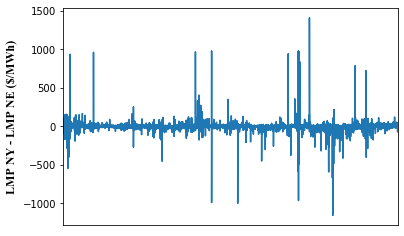

In [6]:
F5 = plt.figure()
CTSdata_PJM['Spread'] = CTSdata_PJM['Gen LBMP'] - CTSdata_PJM['External RTO CTS Price']
Figure = CTSdata_PJM['Spread'].plot(color='tab:blue');
plt.ylabel('LMP NY - LMP NE ($/MWh)', fontsize=12, **figFont)
plt.xlabel('NYISO-PJM (2018)')
Figure.axes.get_xaxis().set_visible(False)
F5.savefig("SpreadNYPJM.pdf", bbox_inches='tight')

print(CTSdata_PJM['Spread'].mean())
print(CTSdata_PJM['Spread'].std())
print(CTSdata_PJM['Spread'].skew())
print(CTSdata_PJM['Spread'].median())

In [7]:
print(abs(CTSdata_PJM['Spread']).mean())
print(abs(CTSdata_PJM['Spread']).std())
print(abs(CTSdata_PJM['Spread']).skew())
print(abs(CTSdata_PJM['Spread']).median())

8.920375614075374
22.112931686861685
24.777103542247108
4.949999999999999


### We need to modify the original data that are given in 10 time stamps for each 15-minute interval. 

As such, we compute the mean of every $10*4$ entries in the data set to derive in total 8752 hourly values for 2018. Note that 8 days of data are missing. This should be no problem, we only want to get general idea of how the price at the proxy buses varies with respect to the power scheduled to flow in the tie-lines.

In [54]:
k = 0
NYprice = np.zeros(8752)
print(len(NYprice))

for j in range(8752):
    NYprice[j] = CTSdata.iloc[k:k+40, 5].mean(axis=0)
    k = (j+1)*40
    
'''
plt.figure(figsize=(12,8))
plt.scatter(np.arange(0,8752,1), NYprice, color='tab:cyan', marker='o', linewidth=0.4);
plt.grid(False)
plt.tick_params(axis="x", labelsize=13)
plt.tick_params(axis="y", labelsize=13)
plt.xlabel('15-minute intervals', fontsize=12, color='black')
plt.ylabel('Price in $/MWh in New York', fontsize=12, color='black')
'''

8752


'\nplt.figure(figsize=(12,8))\nplt.scatter(np.arange(0,8752,1), NYprice, color=\'tab:cyan\', marker=\'o\', linewidth=0.4);\nplt.grid(False)\nplt.tick_params(axis="x", labelsize=13)\nplt.tick_params(axis="y", labelsize=13)\nplt.xlabel(\'15-minute intervals\', fontsize=12, color=\'black\')\nplt.ylabel(\'Price in $/MWh in New York\', fontsize=12, color=\'black\')\n'

In [9]:
k = 0
NYprice_PJM = np.zeros(8752)
print(len(NYprice_PJM))

for j in range(8752):
    NYprice_PJM[j] = CTSdata_PJM.iloc[k:k+40, 5].mean(axis=0)
    k = (j+1)*40
    
'''
plt.figure(figsize=(12,8))
plt.scatter(np.arange(0,8752,1), NYprice_PJM, color='tab:green', marker='+', linewidth=0.4);
plt.grid(False)
plt.tick_params(axis="x", labelsize=13)
plt.tick_params(axis="y", labelsize=13)
plt.xlabel('15-minute intervals', fontsize=12, color='black')
plt.ylabel('Price in $/MWh in New York', fontsize=12, color='black')
'''

8752


'\nplt.figure(figsize=(12,8))\nplt.scatter(np.arange(0,8752,1), NYprice_PJM, color=\'tab:green\', marker=\'+\', linewidth=0.4);\nplt.grid(False)\nplt.tick_params(axis="x", labelsize=13)\nplt.tick_params(axis="y", labelsize=13)\nplt.xlabel(\'15-minute intervals\', fontsize=12, color=\'black\')\nplt.ylabel(\'Price in $/MWh in New York\', fontsize=12, color=\'black\')\n'

In [10]:
m = 0
NEprice = np.zeros(8752)
print(len(NEprice))

for j in range(len(NEprice)):
    NEprice[j] = CTSdata.iloc[k:k+40, 6].mean(axis=0)
    k = (j+1)*40

'''
plt.figure(figsize=(12, 7))
plt.scatter(np.arange(0,8752,1), NEprice, color='tab:green', marker='o', linewidth=0.4);
plt.grid(False)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xlabel('15-minute intervals', fontsize=12, color='black')
plt.ylabel('Price in $/MWh in New England', fontsize=12, color='black')
'''

8752


'\nplt.figure(figsize=(12, 7))\nplt.scatter(np.arange(0,8752,1), NEprice, color=\'tab:green\', marker=\'o\', linewidth=0.4);\nplt.grid(False)\nplt.tick_params(axis="x", labelsize=12)\nplt.tick_params(axis="y", labelsize=12)\nplt.xlabel(\'15-minute intervals\', fontsize=12, color=\'black\')\nplt.ylabel(\'Price in $/MWh in New England\', fontsize=12, color=\'black\')\n'

In [56]:
#Spread = np.subtract(NYprice, NEprice)

#print(abs(Spread).mean())
'''
F1 = plt.figure()
plt.plot(np.arange(0,8752,1), Spread, color='tab:blue', linewidth=1.5);
plt.xlabel('Hour of year', fontsize=12)
plt.ylabel('LMP NY - LMP NE ($/MWh)', fontsize=12)
F1.savefig("SpreadTimeSeries.pdf", bbox_inches='tight')

CTSnew = pd.DataFrame(columns = ['NY Price', 'NE Price', 'Spread'])
CTSnew['NY Price'] = [NYprice[j] for j in range(len(NYprice))]
CTSnew['NE Price'] = [NEprice[j] for j in range(len(NEprice))]
CTSnew['Spread'] = [Spread[j] for j in range(len(Spread))]
'''
CTSnew = pd.DataFrame(columns = ['NY Price', 'NE Price', 'Spread'])
CTSnew['NY Price'] = CTSdata['Gen LBMP']
CTSnew['NE Price'] = CTSdata['External RTO CTS Price']
CTSnew['Spread'] = CTSdata['Gen LBMP'] - CTSdata['External RTO CTS Price']
CTSnew.head()
CTSnew.dropna()

,NY Price,NE Price,Spread
0,152.98,132.98,20.00
1,148.84,128.84,20.00
2,141.54,121.54,20.00
3,140.82,120.82,20.00
4,140.60,120.60,20.00
...,...,...,...
350105,21.07,18.07,3.00
350106,19.04,18.07,0.97
350107,21.07,18.07,3.00
350108,20.57,18.07,2.50


### Now we need to adjust the interchange schedules to be normalized at 8752 hourly values for the year 2018 

In [51]:
CTSschedule = pd.read_csv("OASIS_RTD_Internal_External_Limits_and_Flows" + ".csv")
CTSschedule.head(20)

,RTD End Time Stamp,Interface Name,Interface PTID,RTD Flow MW,Positive Limit,Negative Limit
0,2018/01/01 00:05:00,ISONE-NYISO,23318,-971.90,1400,-1600
1,2018/01/01 00:10:00,ISONE-NYISO,23318,-1038.57,1400,-1600
2,2018/01/01 00:15:00,ISONE-NYISO,23318,-937.95,1400,-1600
3,2018/01/01 00:20:00,ISONE-NYISO,23318,-837.43,1400,-1600
4,2018/01/01 00:25:00,ISONE-NYISO,23318,-837.13,1400,-1600
5,2018/01/01 00:30:00,ISONE-NYISO,23318,-937.52,1400,-1600
6,2018/01/01 00:35:00,ISONE-NYISO,23318,-1038.34,1400,-1600
7,2018/01/01 00:40:00,ISONE-NYISO,23318,-1038.55,1400,-1600
8,2018/01/01 00:45:00,ISONE-NYISO,23318,-938.14,1400,-1600
9,2018/01/01 00:50:00,ISONE-NYISO,23318,-837.73,1400,-1600


In [13]:
CTSschedule.shape

(105758, 6)

In [57]:
'''
n = 0
Schedule = np.zeros(35040)

for j in range(len(Schedule)):
    Schedule[j] = CTSschedule.iloc[n:n+3, 3].mean(axis=0)
    n = (j+1)*3 
#plt.plot(np.arange(0, len(Schedule), 1), Schedule, color='tab:orange', linewidth='1.5');

CTSnew['Interchange'] = [Schedule[j] for j in range(len(NYprice))]
'''
CTSnew['Interchange'] = CTSschedule['RTD Flow MW']
CTSnew.head(20)


,NY Price,NE Price,Spread,Interchange
0,152.98,132.98,20.00,-971.90
1,148.84,128.84,20.00,-1038.57
2,141.54,121.54,20.00,-937.95
3,140.82,120.82,20.00,-837.43
4,140.60,120.60,20.00,-837.13
5,139.27,119.27,20.00,-937.52
6,135.51,121.91,13.60,-1038.34
7,130.27,120.71,9.56,-1038.55
8,123.55,120.59,2.96,-938.14
9,121.00,119.61,1.39,-837.73


In [58]:
# We need to normalize all columns Z = (X-mean)/std
norm_CTS = (CTSnew- CTSnew.mean(axis=0))/CTSnew.std(axis=0)

# Let's drop the NaN values from our dataset
norm_CTS = norm_CTS.dropna()

X = norm_CTS[["Interchange", "NY Price"]]
y = norm_CTS["NE Price"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
model.summary()

/Users/mariolandrio/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NE Price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.135e+06
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:41:47   Log-Likelihood:                 24515.
No. Observations:              105758   AIC:                        -4.902e+04
Df Residuals:                  105755   BIC:                        -4.900e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0276      0.001    -44.770      0.000      -0.029      -0.026
Interchange    -0.0094      0.001    -15.897      0.000      -0.011      -0.008
NY Price        0.9113      0.001   1504.620      0.000       0.910       0.912
==============================================================================
Omnibus:                    50137.732   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20844255.611
Skew:                           0.985   Prob(JB):                         0.00
Kurtosis:                      71.749   Cond. No.                         1.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

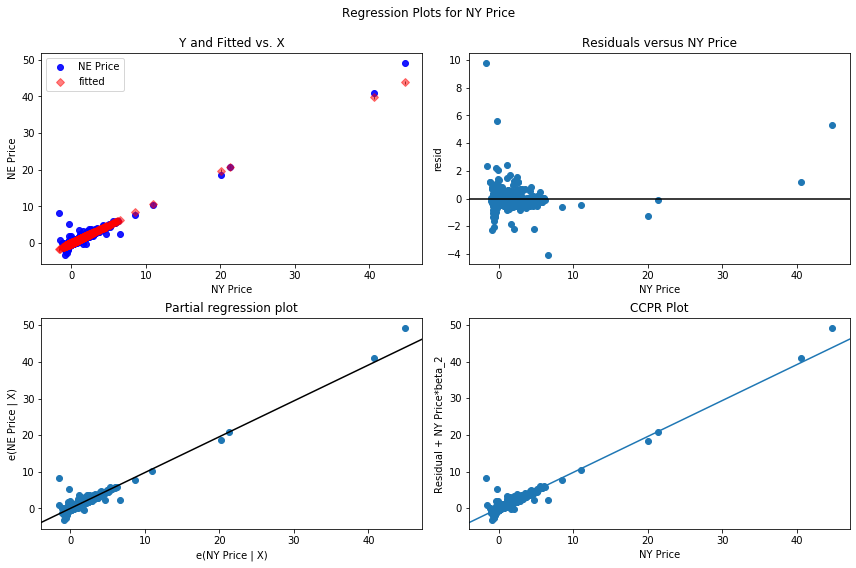

In [16]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'NY Price', fig=fig)

In [49]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
slice = 30
X = norm_CTS.iloc[0:slice, 3]
X = sm.add_constant(X)
y = norm_CTS.iloc[0:slice, 2]
reg = TheilSenRegressor(random_state=0).fit(X, y)
reg.score(X, y)

/Users/mariolandrio/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


-0.01982720951197603

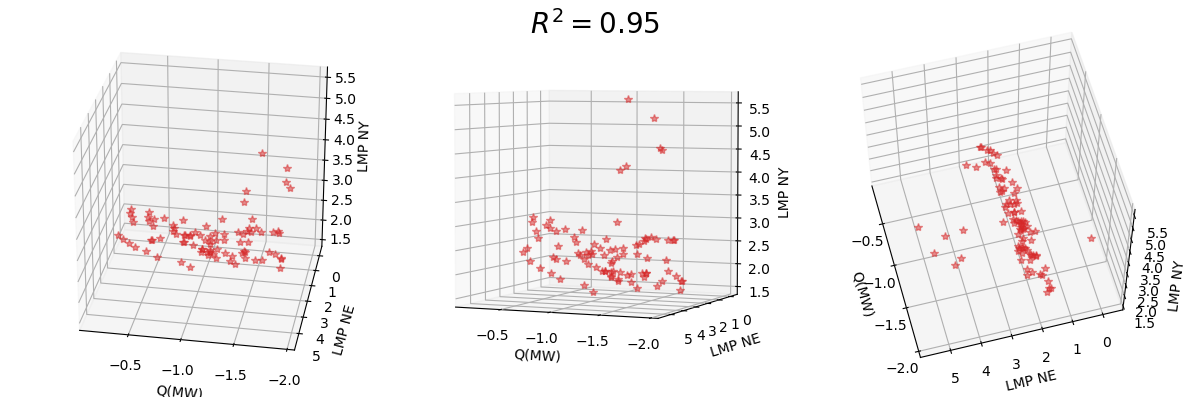

In [124]:
from mpl_toolkits.mplot3d import Axes3D

#############################3D PLOT#############################

plt.style.use('default')

slice = 89

x = norm_CTS.iloc[0:slice, 3]
y = norm_CTS.iloc[0:slice, 1]
z = norm_CTS.iloc[0:slice, 0]
predicted = predicted.iloc[0:slice]


fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='tab:red', zorder=15, linestyle='none', marker='*', alpha=0.5)
    #ax.scatter(x, y, predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Q(MW)', fontsize=10)
    ax.set_ylabel('LMP NE', fontsize=10)
    ax.set_zlabel('LMP NY', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
'''    
ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax3.transAxes, color='grey', alpha=0.5)
'''           
ax1.view_init(elev=28, azim=100)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % 0.95, fontsize=20)

fig.tight_layout()

In [24]:
norm_CTS.head(10)

,NY Price,NE Price,Spread,Interchange
125,1.142612,1.038855,-0.663606,-3.826160
126,1.333797,1.209367,-0.057578,-2.008140
127,1.293897,1.177090,-0.230314,-1.791598
128,1.271744,1.176819,-0.786687,-4.059794
172,0.830141,0.724572,-0.931613,-1.217827
180,0.721856,0.597606,-0.672458,-0.031383
181,0.745926,0.538258,0.186746,-0.314715
182,0.803262,0.590183,0.278601,-0.790665
183,0.860496,0.653352,0.297900,-1.003172
184,0.914840,0.668723,0.575184,-1.312665


### Let's perform some robust regression : Huber Regression